In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

def save_npz_images(npz_path, save_dir, num_images=50):
    """
    从 .npz 文件中加载 RGB 图片，并保存到指定目录。

    参数:
    - npz_path (str): .npz 文件的路径
    - save_dir (str): 图片保存的目标目录
    - num_images (int): 需要保存的图片数量（默认为 50）
    """
    # 确保保存目录存在
    os.makedirs(save_dir, exist_ok=True)

    # 加载 .npz 文件
    data = np.load(npz_path)

    # 获取图片数组，通常存储在 'arr_0'，可能需要检查具体 key
    images = data["arr_0"]  # shape: (N, H, W, C) 其中 C 可能是 3(RGB) 或 4(RGBA)

    # 确保不超过总图片数
    num_images = min(num_images, images.shape[0])

    # 遍历并保存图片
    for i in range(num_images):
        img = images[i]

        # 确保图像是 uint8 类型
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)  # 归一化到 [0,255]

        # 如果图像是 RGBA（C=4），转换为 RGB
        if img.shape[-1] == 4:
            img = Image.fromarray(img).convert("RGB")
        else:
            img = Image.fromarray(img)

        # 保存为 RGB 格式的 PNG
        save_path = os.path.join(save_dir, f"sample_{i}.png")
        img.save(save_path, format="PNG")

    print(f"✅ 已成功保存 {num_images} 张 RGB 图片到 {save_dir}")



step='0040000'

npz_path=f"/home/chunjielu/guided-diffusion-main/output/0417/samples_50000x32x32x3_cifar10_scale13_conv_R.npz"
save_dir=f"/home/chunjielu/guided-diffusion-main/output/0417/image_store/"
save_npz_images(npz_path,save_dir,num_images=50000)


#real_images_path = "/home/chunjielu/guided-diffusion-main/datasets/cifar_train"

# 生成图片路径
fake_images_path = save_dir


✅ 已成功保存 50000 张 RGB 图片到 /home/chunjielu/guided-diffusion-main/output/0417/image_store/


In [2]:
import torch_fidelity
real_images_path = "/home/chunjielu/guided-diffusion-main/datasets/cifar_train"
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall

Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/guided-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
/home/chunjielu/miniconda3/envs/MyPytorch/lib/python3.10/site-packages/torch_fidelity/datasets.py:16: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(img.tobytes())).view(height, width, 3)
Processing samples                                                                                                                                                                                                                         
Extracting

{'inception_score_mean': 11.245999596317882, 'inception_score_std': 0.14359794611219023, 'frechet_inception_distance': 4.424920335060392, 'kernel_inception_distance_mean': 0.002635708521021027, 'kernel_inception_distance_std': 0.0005211198112008845}


In [119]:
import torch_fidelity
# org ddim250
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall



Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k_orgtest" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 9.30876026872312
                                                       

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 9.30876026872312, 'kernel_inception_distance_mean': 0.003533515930175781, 'kernel_inception_distance_std': 0.0005935962216286652}


Kernel Inception Distance: 0.003533515930175781 ± 0.0005935962216286652


In [106]:
import torch_fidelity
# 240000
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall



Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k_240000" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 10.086061517744838
                                                      

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 10.086061517744838, 'kernel_inception_distance_mean': 0.004516797065734863, 'kernel_inception_distance_std': 0.0007374916267002604}


Kernel Inception Distance: 0.004516797065734863 ± 0.0007374916267002604


In [116]:
import torch_fidelity
# 300000
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall

Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k_300000" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 9.93484445884826
                                                        

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 9.93484445884826, 'kernel_inception_distance_mean': 0.004096083641052246, 'kernel_inception_distance_std': 0.000599073436753195}


Kernel Inception Distance: 0.004096083641052246 ± 0.000599073436753195


In [122]:
import torch_fidelity
# 330000
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall

Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k_330000" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 9.957244749246513
                                                       

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 9.957244749246513, 'kernel_inception_distance_mean': 0.004179356098175049, 'kernel_inception_distance_std': 0.0006371354322639271}


Kernel Inception Distance: 0.004179356098175049 ± 0.0006371354322639271


In [103]:
import torch_fidelity
# 320000
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall

Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k_320000" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 9.550270675465754
                                                       

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 9.550270675465754, 'kernel_inception_distance_mean': 0.0038827943801879885, 'kernel_inception_distance_std': 0.0006289863816877067}


Kernel Inception Distance: 0.0038827943801879885 ± 0.0006289863816877067


In [109]:
import torch_fidelity
# 400000
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall

Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k_400000" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 10.30702104209007
                                                       

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 10.30702104209007, 'kernel_inception_distance_mean': 0.0045154643058776854, 'kernel_inception_distance_std': 0.0005691068461638136}


Kernel Inception Distance: 0.0045154643058776854 ± 0.0005691068461638136


In [112]:
import torch_fidelity
# 500000
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2=fake_images_path,
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall

Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k_500000" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 10.596823857385345
Kernel Inception Distance: 0.0045102500915527345 ± 0.0

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 10.596823857385345, 'kernel_inception_distance_mean': 0.0045102500915527345, 'kernel_inception_distance_std': 0.0006131010483594193}


In [113]:
import torch_fidelity
# 5000image scale 25 
metrics = torch_fidelity.calculate_metrics(
    input1=real_images_path,
    input2="/home/chunjielu/guided-diffusion-main/datasets/cifar10_sample_scale25/",
    cuda=True,
    isc=True, 
    fid=True, 
    kid=True,
    precision=True,  # 确保 Precision 计算
    recall=True,  # 确保 Recall 计算
)
print(metrics)  # 应该输出 FID, Precision, Recall

Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Looking for samples non-recursivelty in "/home/chunjielu/improved-diffusion-main/datasets/cifar_train" with extensions png,jpg,jpeg
Found 50000 samples
Processing samples                                                                                                                                                                  
Extracting features from input2
Looking for samples non-recursivelty in "/home/chunjielu/guided-diffusion-main/datasets/cifar10_sample_scale25/" with extensions png,jpg,jpeg
Found 5000 samples
Processing samples                                                                                                                                                                  
Inception Score: 11.246109759488816 ± 0.14354502576821576
Frechet Inception Distance: 8.136301460233199
Kernel Inception Distance: 0.0009560585021972656 ± 0.0002598463881

{'inception_score_mean': 11.246109759488816, 'inception_score_std': 0.14354502576821576, 'frechet_inception_distance': 8.136301460233199, 'kernel_inception_distance_mean': 0.0009560585021972656, 'kernel_inception_distance_std': 0.0002598463881246769}


In [73]:
from PIL import Image
img = Image.open(f"/home/chunjielu/improved-diffusion-main/datasets/cifar10_gen_on_scale25_5k/sample_0.png")
print(f"Image size: {img.size}")  # 输出图片分辨率，如 (28, 28)
print(f"Image mode: {img.mode}")  # 输出图片模式，如 'L' 表示灰度图



img = Image.open(f"/home/chunjielu/improved-diffusion-main/datasets/cifar_train/bird_00006.png")
print(f"Image size: {img.size}")  # 输出图片分辨率，如 (28, 28)
print(f"Image mode: {img.mode}")

Image size: (32, 32)
Image mode: RGB
Image size: (32, 32)
Image mode: RGB


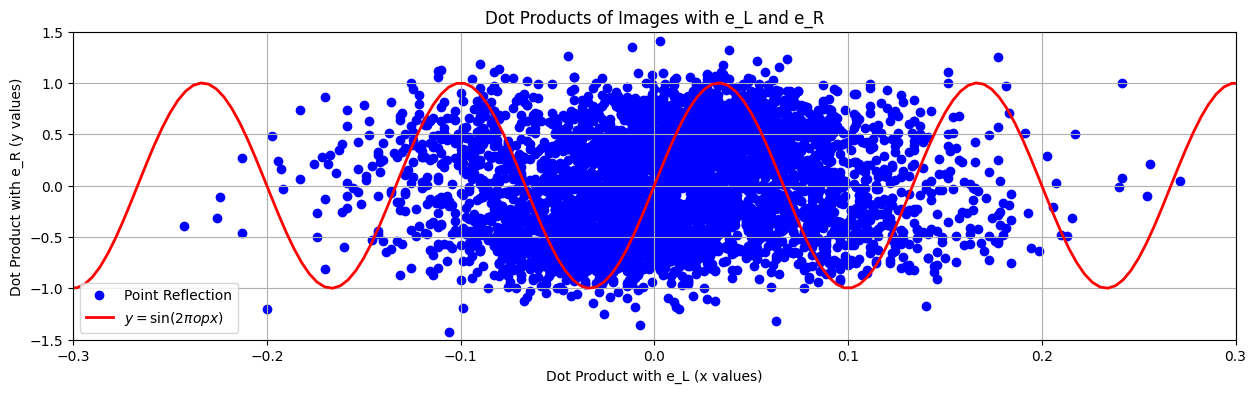

: 

In [ ]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt

# 加载 e_L 和 e_R
e_L = th.load('/home/chunjielu/guided-diffusion-main/saved_tensors/e_L.pt')
e_R = th.load('/home/chunjielu/guided-diffusion-main/saved_tensors/e_R.pt')

# 加载图片数据
numbers=5000
scl=0

data = np.load(f"/home/chunjielu/home/chunjielu/improved-diffusion-main/output/orgmodel_190000/samples_5000x32x32x3.npz")
images = data["arr_0"]  # 这里的 key 可能是 'arr' 或 'samples'

#  show the reflected vector 
x_values = []
y_values = []

def point_reflect(image_org, e_L, e_R):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    #image_org = (image_org - mean) / std  # 归一化到 [0, 1]
   
    #image_org = (image_org - np.min(image_org)) / (np.max(image_org) - np.min(image_org))

    image = np.transpose(image_org, (2, 0, 1))  # 转换为 (C, H, W)
    
    # 将 numpy 数组转换为 torch tensor
    image = th.tensor(image, dtype=th.float32)  # 转换为 tensor
    #image/=(255.0)
    #image/=255.0
    image=image/127.5-1

    # 展平 tensor
    image = image.reshape(-1)  # 转换为一维
    
    # 计算点积
    x = th.matmul(image, e_L)
    x=th.floor(x/0.01)
    x=x/700
    #x=x*10
    y = th.matmul(image, e_R)
    #y=y*10
    #print(f'op {x},{y}')
    
    # 将 x 和 y 添加到列表中
    x_values.append(x.item())  # 使用 .item() 获取原始数值
    y_values.append(y.item())  # 使用 .item() 获取原始数值

# 计算每张图片的点积
for i in range(numbers):  # 这里只处理前 10 张图片
    point_reflect(images[i], e_L, e_R)

# 绘制所有点积的图形
plt.figure(figsize=(15, 4))

# 绘制 x 和 y 点积
plt.scatter(x_values, y_values, c='blue', label='Point Reflection')
x_curve = np.linspace(-10, 10, 5000)
y_curve = np.sin(3 * 5*np.pi * x_curve)  # 计算对应的 y 值
plt.plot(x_curve, y_curve, 'r-', linewidth=2, label=r'$y = \sin(2\pi opx)$')  # 画红色曲线
# 标注
plt.xlim([-0.3, 0.3])
plt.ylim([-1.5, 1.5])
plt.xlabel('Dot Product with e_L (x values)')
plt.ylabel('Dot Product with e_R (y values)')
plt.title('Dot Products of Images with e_L and e_R')

# 显示图例
plt.legend()

# 显示图像
plt.grid(True)
plt.show()
